# [Introduction](https://www.kaggle.com/kernels/fork/3370272)

**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**

---

As a warm-up, you'll review some machine learning fundamentals and submit your initial results to a Kaggle competition.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
"""
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex1 import *
print("Setup Complete")
"""

'\n# Set up code checking\nfrom learntools.core import binder\nbinder.bind(globals())\nfrom learntools.ml_intermediate.ex1 import *\nprint("Setup Complete")\n'

You will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) to predict home prices in Iowa using 79 explanatory variables describing (almost) every aspect of the homes.  

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation features in `X_train` and `X_valid`, along with the prediction targets in `y_train` and `y_valid`.  The test features are loaded in `X_test`.  (_If you need to review **features** and **prediction targets**, please check out [this short tutorial](https://www.kaggle.com/dansbecker/your-first-machine-learning-model).  To read about model **validation**, look [here](https://www.kaggle.com/dansbecker/model-validation).  Alternatively, if you'd prefer to look through a full course to review all of these topics, start [here](https://www.kaggle.com/learn/machine-learning).)_

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from trainig data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

Use the next cell to print the first several rows of the data. It's a nice way to get an overview of the data you will use in your price prediction model.

In [3]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


# Step 1: Evaluate several models

The next code cell defines five different random forest models.  Run this code cell without changes.  (_To review **random forests**, look [here](https://www.kaggle.com/dansbecker/random-forests)._)

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50,random_state=0)
model_2 = RandomForestRegressor(n_estimators=100,random_state=0)
model_3 = RandomForestRegressor(n_estimators=100,criterion='mae',random_state=0)
model_4 = RandomForestRegressor(n_estimators=200,min_samples_split=20,random_state=0)
model_5 = RandomForestRegressor(n_estimators=100,max_depth=7,random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

To select the best model out of the five, we define a function `score_model()` below.  This function returns the mean absolute error (MAE) from the validation set.  Recall that the best model will obtain the lowest MAE.  (_To review **mean absolute error**, look [here](https://www.kaggle.com/dansbecker/model-validation).)_

Run the code cell without changes.

In [5]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v= X_valid, y_t= y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    pred = model.predict(X_v)
    return mean_absolute_error(y_v, pred)

for i in range(0,len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" %(i+1, mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


Use the above results to fill in the line below.  Which model is the best model?  Your answer should be one of `model_1`, `model_2`, `model_3`, `model_4`, or `model_5`.

In [6]:
# Fill in the best model
best_model = model_3

# Step 2: Generate test predictions

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name `my_model`.

In [7]:
# Define a model
my_model = RandomForestRegressor() # Your code here
my_model = best_model

Run the next code cell without changes.  The code fits the model to the training and validation data, and then generates test predictions that are saved to a CSV file.  These test predictions can be submitted directly to the competition!

In [8]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
pred_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': pred_test})
output.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Step 3: Submit your results

Once you have successfully completed Step 2, you're ready to submit your results to the leaderboard!  First, you'll need to join the competition if you haven't already.  So open a new window by clicking on [this link](https://www.kaggle.com/c/home-data-for-ml-course).  Then click on the **Join Competition** button.

![join competition image](https://i.imgur.com/wLmFtH3.png)

Next, follow the instructions below:
- Begin by clicking on the blue **COMMIT** button in the top right corner of this window.  This will generate a pop-up window.  
- After your code has finished running, click on the blue **Open Version** button in the top right of the pop-up window.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
- Click on the **Output** tab on the left of the screen.  Then, click on the **Submit to Competition** button to submit your results to the leaderboard.
- If you want to keep working to improve your performance, select the blue **Edit** button in the top right of the screen. Then you can change your model and repeat the process.

# Keep going

You've made your first model. But how can you quickly make it better?

Learn how to improve your competition results by incorporating columns with **[missing values](https://www.kaggle.com/alexisbcook/missing-values)**.

---
**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*

# [Missing values](https://www.kaggle.com/kernels/fork/3370280)


**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**

---

Now it's your turn to test your new knowledge of **missing values** handling. You'll probably find it makes a big difference.



In this exercise, you will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course). 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'],inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'],axis=1, inplace=True)
X_test_full.drop(['SalePrice'],axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictions
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

Use the next code cell to print the first five rows of the data.

In [10]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,774,0,108,0,0,260,0,0,7,2007
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,308,0,0,0,0,0,0,0,8,2009
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,432,0,0,44,0,0,0,0,8,2009
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,857,150,59,0,0,0,0,0,7,2008
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006


You can already see a few missing values in the first several rows.  In the next step, you'll obtain a more comprehensive understanding of the missing values in the dataset.

# Step 1: Preliminary investigation

Run the code cell below without changes.

In [11]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of traing data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column>0])

(1168, 36)
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


### Part A

Use the above output to answer the questions below.

In [12]:
# Fill in the line below: How many rows are in the training data?
#num_rows = 1168
num_rows, num_columns = X_train.shape

# Fill in the line below: How many columns in the training data
# have missing values?
#num_cols_with_missing = 3
num_cols_with_missing = len(missing_val_count_by_column[missing_val_count_by_column>0])

# Fill in the line below: How many missing entries are contained in 
# all of the training data?
#tot_missing = 212+6+58
tot_missing = missing_val_count_by_column[missing_val_count_by_column>0].sum()


### Part B
Considering your answers above, what do you think is likely the best approach to dealing with the missing values?

Hint: Does the dataset have a lot of missing values, or just a few? Would we lose much information if we completely ignored the columns with missing entries?

Solution: Since there are relatively few missing entries in the data (the column with the greatest percentage of missing values is missing less than 20% of its entries), we can expect that dropping columns is unlikely to yield good results. This is because we'd be throwing away a lot of valuable data, and so imputation will likely perform better.

To compare different approaches to dealing with missing values, you'll use the same `score_dataset()` function from the tutorial.  This function reports the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) from a random forest model.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Step 2: Drop columns with missing values

In this step, you'll preprocess the data in `X_train` and `X_valid` to remove columns with missing values.  Set the preprocessed DataFrames to `reduced_X_train` and `reduced_X_valid`, respectively.  

In [14]:
# Fill in the line below: get names of columns with missing values
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Fill in the lines below: drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)


Check: When you've updated the starter code, check() will tell you whether your code is correct. You need to update the code that creates variables reduced_X_train, reduced_X_valid

Run the next code cell without changes to obtain the MAE for this approach.

In [15]:
print("MAE (Drop columns with missing values): ")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values): 
17837.82570776256


# Step 3: Imputation

### Part A

Use the next code cell to impute missing values with the mean value along each column.  Set the preprocessed DataFrames to `imputed_X_train` and `imputed_X_valid`.  Make sure that the column names match those in `X_train` and `X_valid`.

In [16]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Fill in the lines below: imputation removed columns names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

Run the next code cell without changes to obtain the MAE for this approach.

In [17]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18062.894611872147


### Part B

Compare the MAE from each approach.  Does anything surprise you about the results?  Why do you think one approach performed better than the other?

Hint: Did removing missing values yield a larger or smaller MAE than imputation? Does this agree with the coding example from the tutorial?

Solution: Given that thre are so few missing values in the dataset, we'd expect imputation to perform better than dropping columns entirely. However, we see that dropping columns performs slightly better! While this can probably partially be attributed to noise in the dataset, another potential explanation is that the imputation method is not a great match to this dataset. That is, maybe instead of filling in the mean value, it makes more sense to set every missing value to a value of 0, to fill in the most frequently encountered value, or to use some other method. For instance, consider the GarageYrBlt column (which indicates the year that the garage was built). It's likely that in some cases, a missing value could indicate a house that does not have a garage. Does it make more sense to fill in the median value along each column in this case? Or could we get better results by filling in the minimum value along each column? It's not quite clear what's best in this case, but perhaps we can rule out some options immediately - for instance, setting missing values in this column to 0 is likely to yield horrible results!

# Step 4: Generate test predictions

In this final step, you'll use any approach of your choosing to deal with missing values.  Once you've preprocessed the training and validation features, you'll train and evaluate a random forest model.  Then, you'll preprocess the test data before generating predictions that can be submitted to the competition!

### Part A

Use the next code cell to preprocess the training and validation data.  Set the preprocessed DataFrames to `final_X_train` and `final_X_valid`.  **You can use any approach of your choosing here!**  in order for this step to be marked as correct, you need only ensure:
- the preprocessed DataFrames have the same number of columns,
- the preprocessed DataFrames have no missing values, 
- `final_X_train` and `y_train` have the same number of rows, and
- `final_X_valid` and `y_valid` have the same number of rows.

In [18]:
median_imputer = SimpleImputer(strategy='median')

median_imputed_X_train = pd.DataFrame(median_imputer.fit_transform(X_train))
median_imputed_X_valid = pd.DataFrame(median_imputer.transform(X_valid))

median_imputed_X_train.columns = X_train.columns
median_imputed_X_valid.columns = X_valid.columns

print("MAE (Median Imputation):")
print(score_dataset(median_imputed_X_train, median_imputed_X_valid, y_train, y_valid))

MAE (Median Imputation):
17791.59899543379


In [19]:
most_frequent_imputer = SimpleImputer(strategy = 'most_frequent')

most_frequent_imputed_X_train = pd.DataFrame(most_frequent_imputer.fit_transform(X_train))
most_frequent_imputed_X_valid = pd.DataFrame(most_frequent_imputer.transform(X_valid))

most_frequent_imputed_X_train.columns = X_train.columns
most_frequent_imputed_X_valid.columns = X_valid.columns

print("MAE (most_frequent Imputation):")
print(score_dataset(most_frequent_imputed_X_train, most_frequent_imputed_X_valid, y_train, y_valid))

MAE (most_frequent Imputation):
17956.065479452056


In [20]:
# Preprocessed training and validation features
final_imputer = median_imputer
final_X_train = median_imputed_X_train
final_X_valid = median_imputed_X_valid


Run the next code cell to train and evaluate a random forest model.  (*Note that we don't use the `score_dataset()` function above, because we will soon use the trained model to generate test predictions!*)

In [21]:
# Define and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(final_X_valid)

print("MAE (Your approach): ")
print(mean_absolute_error(y_valid, preds_valid))

MAE (Your approach): 
17791.59899543379


### Part B

Use the next code cell to preprocess your test data.  Make sure that you use a method that agrees with how you preprocessed the training and validation data, and set the preprocessed test features to `final_X_test`.

Then, use the preprocessed test features and the trained model to generate test predictions in `preds_test`.

In order for this step to be marked correct, you need only ensure:
- the preprocessed test DataFrame has no missing values, and
- `final_X_test` has the same number of rows as `X_test`.

In [22]:
# Fill in the line below: preprocess test data
final_X_test = pd.DataFrame(final_imputer.fit_transform(X_test))
                            
# Fill in the line below: get test predictions
preds_test = model.predict(final_X_test)


Run the next code cell without changes to save your results to a CSV file that can be submitted directly to the competition.

In [23]:
# Save test predictions to file
output = pd.DataFrame({'Id':X_test.index,
                       'SalePrice':preds_test})
output.to_csv('submission.csv', index=False)

# Step 5: Submit your results

Once you have successfully completed Step 4, you're ready to submit your results to the leaderboard!  (_You also learned how to do this in the previous exercise.  If you need a reminder of how to do this, please use the instructions below._)  

First, you'll need to join the competition if you haven't already.  So open a new window by clicking on [this link](https://www.kaggle.com/c/home-data-for-ml-course).  Then click on the **Join Competition** button.

![join competition image](https://i.imgur.com/wLmFtH3.png)

Next, follow the instructions below:
- Begin by clicking on the blue **COMMIT** button in the top right corner.  This will generate a pop-up window.  
- After your code has finished running, click on the blue **Open Version** button in the top right of the pop-up window.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
- Click on the **Output** tab on the left of the screen.  Then, click on the **Submit to Competition** button to submit your results to the leaderboard.
- If you want to keep working to improve your performance, select the blue **Edit** button in the top right of the screen. Then you can change your model and repeat the process.

# Keep going

Move on to learn what **[categorical variables](https://www.kaggle.com/alexisbcook/categorical-variables)** are, along with how to incorporate them into your machine learning models.  Categorical variables are very common in real-world data, but you'll get an error if you try to plug them into your models without processing them first!

---
**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*

# [Categorical Variables](https://www.kaggle.com/kernels/fork/3370279)


**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**

---

By encoding **categorical variables**, you'll obtain your best results thus far!


In this exercise, you will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course). 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

# Break off validatin set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

Use the next code cell to print the first five rows of the data.

In [25]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,RL,11694,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,108,0,0,260,0,0,7,2007,New,Partial
871,20,RL,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,0,8,2009,WD,Normal
93,30,RL,13360,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,...,0,44,0,0,0,0,8,2009,WD,Normal
818,20,RL,13265,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,59,0,0,0,0,0,7,2008,WD,Normal
303,20,RL,13704,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,...,81,0,0,0,0,0,1,2006,WD,Normal


Notice that the dataset contains both numerical and categorical variables.  You'll need to encode the categorical data before training a model.

To compare different models, you'll use the same `score_dataset()` function from the tutorial.  This function reports the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) from a random forest model.

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Step 1: Drop columns with categorical data

You'll get started with the most straightforward approach.  Use the code cell below to preprocess the data in `X_train` and `X_valid` to remove columns with categorical data.  Set the preprocessed DataFrames to `drop_X_train` and `drop_X_valid`, respectively.  

In [27]:
# Exclude categorical variables (data type: object) from the dataset
# Drop columns in training and validation data
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

Run the next code cell to get the MAE for this approach.

In [28]:
print("MAE from Approach 1 (Drop categorical variables): ")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables): 
17837.82570776256


# Step 2: Label encoding

Before jumping into label encoding, we'll investigate the dataset.  Specifically, we'll look at the `'Condition2'` column.  The code cell below prints the unique entries in both the training and validation sets.

In [29]:
print("Unique values in 'Condition2' column in training data: ", X_train['Condition2'].unique())
print("\n Unique values in 'Condition2' column in validation data: ", X_valid['Condition2'].unique())

Unique values in 'Condition2' column in training data:  ['Norm' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAe']

 Unique values in 'Condition2' column in validation data:  ['Norm' 'RRAn' 'RRNn' 'Artery' 'Feedr' 'PosN']


If you now write code to: 
- fit a label encoder to the training data, and then 
- use it to transform both the training and validation data, 

you'll get an error.  Can you see why this is the case?  (_You'll need  to use the above output to answer this question._)

Hint: Are there any values that appear in the validation data but not in the training data?

Solution: Fitting a label encoder to a column in the training data creates a corresponding integer-valued label for each unique value that appears in the training data. In the case that the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them. Notice that the 'Condition2' column in the validation data contains the values 'RRAn' and 'RRNn', but these don't appear in the training data -- thus, if we try to use a label encoder with scikit-learn, the code will throw an error.

This is a common problem that you'll encounter with real-world data, and there are many approaches to fixing this issue.  For instance, you can write a custom label encoder to deal with new categories.  The simplest approach, however, is to drop the problematic categorical columns.  

Run the code cell below to save the problematic columns to a Python list `bad_label_cols`.  Likewise, columns that can be safely label encoded are stored in `good_label_cols`.

In [30]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype=="object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if set(X_train[col])==set(X_valid[col])]

# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))

print("Categorical columns that will be label encoded: ",good_label_cols)
print("\n Categorical columns that will be dropped from dataset: ",bad_label_cols)



Categorical columns that will be label encoded:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleCondition']

 Categorical columns that will be dropped from dataset:  ['Exterior2nd', 'Utilities', 'Functional', 'Neighborhood', 'RoofStyle', 'SaleType', 'Exterior1st', 'ExterCond', 'LandSlope', 'HeatingQC', 'Condition2', 'Condition1', 'Heating', 'RoofMatl', 'Foundation']


Use the next code cell to label encode the data in `X_train` and `X_valid`.  Set the preprocessed DataFrames to `label_X_train` and `label_X_valid`, respectively.  
- We have provided code below to drop the categorical columns in `bad_label_cols` from the dataset. 
- You should label encode the categorical columns in `good_label_cols`.  

In [31]:
from sklearn.preprocessing import LabelEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

# Apply label encoder
label_encoder = LabelEncoder()

for col in good_label_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

Run the next code cell to get the MAE for this approach.

In [32]:
print("MAE from Approach 2 (Label Encoding): ")
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Label Encoding): 
17575.291883561644


# Step 3: Investigating cardinality

So far, you've tried two different approaches to dealing with categorical variables.  And, you've seen that encoding categorical data yields better results than removing columns from the dataset.

Soon, you'll try one-hot encoding.  Before then, there's one additional topic we need to cover.  Begin by running the next code cell without changes.  

In [33]:
# Get number of unique entries in each column with categorical data
object_unique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_unique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

The output above shows, for each column with categorical data, the number of unique values in the column.  For instance, the `'Street'` column in the training data has two unique values: `'Grvl'` and `'Pave'`, corresponding to a gravel road and a paved road, respectively.

We refer to the number of unique entries of a categorical variable as the **cardinality** of that categorical variable.  For instance, the `'Street'` variable has cardinality 2.

Use the output above to answer the questions below.

In [34]:
# Fill in the line below: How many categorical variables in the training data
# have cardinality greater than 10?
high_cardinality_numcols = 3

# Fill in the line below: How many columns are needed to one-hot encode the 
# 'Neighborhood' variable in the training data?
num_cols_neighborhood = 25
num_cols_neighborhood = d['Neighborhood']


For large datasets with many rows, one-hot encoding can greatly expand the size of the dataset.  For this reason, we typically will only one-hot encode columns with relatively low cardinality.  Then, high cardinality columns can either be dropped from the dataset, or we can use label encoding.

As an example, consider a dataset with 10,000 rows, and containing one categorical column with 100 unique entries.  
- If this column is replaced with the corresponding one-hot encoding, how many entries are added to the dataset?  
- If we instead replace the column with the label encoding, how many entries are added?  

Use your answers to fill in the lines below.

In [35]:
# Fill in the line below: How many entries are added to the dataset by 
# replacing the column with a one-hot encoding?
OH_entries_added = 10000*100-10000

# Fill in the line below: How many entries are added to the dataset by
# replacing the column with a label encoding?
label_entries_added = 0


In [36]:
# Solution:

# How many entries are added to the dataset by
# replacing the column with a one-hot encoding?
OH_entries_added = 1e4*100 - 1e4

# How many entries are added to the dataset by
# replacing the column with a label encoding?
label_entries_added = 0

# Step 4: One-hot encoding

In this step, you'll experiment with one-hot encoding.  But, instead of encoding all of the categorical variables in the dataset, you'll only create a one-hot encoding for columns with cardinality less than 10.

Run the code cell below without changes to set `low_cardinality_cols` to a Python list containing the columns that will be one-hot encoded.  Likewise, `high_cardinality_cols` contains a list of categorical columns that will be dropped from the dataset.

In [37]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print("Categorical columns that will be one-hot encoded: ",low_cardinality_cols)
print("\n Categorical columns that will be dropped from the dataset: ", high_cardinality_cols)

Categorical columns that will be one-hot encoded:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

 Categorical columns that will be dropped from the dataset:  ['Exterior1st', 'Exterior2nd', 'Neighborhood']


Use the next code cell to one-hot encode the data in `X_train` and `X_valid`.  Set the preprocessed DataFrames to `OH_X_train` and `OH_X_valid`, respectively.  
- The full list of categorical columns in the dataset can be found in the Python list `object_cols`.
- You should only one-hot encode the categorical columns in `low_cardinality_cols`.  All other categorical columns should be dropped from the dataset. 

In [38]:
from sklearn.preprocessing import OneHotEncoder
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

Run the next code cell to get the MAE for this approach.

In [39]:
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
17525.345719178084


# Step 5: Generate test predictions and submit your results

After you complete Step 4, if you'd like to use what you've learned to submit your results to the leaderboard, you'll need to preprocess the test data before generating predictions.

**This step is completely optional, and you do not need to submit results to the leaderboard to successfully complete the exercise.**

Check out the previous exercise if you need help with remembering how to [join the competition](https://www.kaggle.com/c/home-data-for-ml-course) or save your results to CSV.  Once you have generated a file with your results, follow the instructions below:
- Begin by clicking on the blue **COMMIT** button in the top right corner.  This will generate a pop-up window.  
- After your code has finished running, click on the blue **Open Version** button in the top right of the pop-up window.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
- Click on the **Output** tab on the left of the screen.  Then, click on the **Submit to Competition** button to submit your results to the leaderboard.
- If you want to keep working to improve your performance, select the blue **Edit** button in the top right of the screen. Then you can change your model and repeat the process.

# Keep going

With missing value handling and categorical encoding, your modeling process is getting complex. This complexity gets worse when you want to save your model to use in the future. The key to managing this complexity is something called **pipelines**. 

**[Learn to use pipelines](https://www.kaggle.com/alexisbcook/pipelines)** to preprocess datasets with categorical variables, missing values and any other messiness your data throws at you.

---
**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*

# [Pipelines](https://www.kaggle.com/kernels/fork/3370278)


**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**

---


In this exercise, you will use **pipelines** to improve the efficiency of your machine learning code.



You will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course). 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_col = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]

# Keep selected columns only
my_cols = categorical_col + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [41]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007
871,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,...,308,0,0,0,0,0,0,0,8,2009
93,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,432,0,0,44,0,0,0,0,8,2009
818,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,857,150,59,0,0,0,0,0,7,2008
303,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,843,468,81,0,0,0,0,0,1,2006


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_cols),
    ('cat',categorical_transformer,categorical_col)
])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a a pipeline
clf = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])

# Preprocessing of traininf data, fit model
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print("MAE: ",mean_absolute_error(y_valid, preds))


MAE:  17861.780102739725


The code yields a value around 17862 for the mean absolute error (MAE).  In the next step, you will amend the code to do better.

# Step 1: Improve the performance

### Part A

Now, it's your turn!  In the code cell below, define your own preprocessing steps and random forest model.  Fill in values for the following variables:
- `numerical_transformer`
- `categorical_transformer`
- `model`

To pass this part of the exercise, you need only define valid preprocessing steps and a random forest model.

In [43]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_cols),
    ('cat',categorical_transformer,categorical_col)
])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [44]:
"""
#Solution:

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)
"""

"\n#Solution:\n\n# Preprocessing for numerical data\nnumerical_transformer = SimpleImputer(strategy='constant')\n\n# Preprocessing for categorical data\ncategorical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='constant')),\n    ('onehot', OneHotEncoder(handle_unknown='ignore'))\n])\n\n# Bundle preprocessing for numerical and categorical data\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', numerical_transformer, numerical_cols),\n        ('cat', categorical_transformer, categorical_cols)\n    ])\n\n# Define model\nmodel = RandomForestRegressor(n_estimators=100, random_state=0)\n"

### Part B

Run the code cell below without changes.

To pass this step, you need to have defined a pipeline in **Part A** that achieves lower MAE than the code above.  You're encouraged to take your time here and try out many different approaches, to see how low you can get the MAE!  (_If your code does not pass, please amend the preprocessing steps and model in Part A._)

In [45]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print("MAE: ",score)

MAE:  17487.872363013696


# Step 2: Generate test predictions

Now, you'll use your trained model to generate predictions with the test data.

In [46]:
# Preprocessing of test data, fit model
preds_test = my_pipeline.predict(X_test) # Your code here


Run the next code cell without changes to save your results to a CSV file that can be submitted directly to the competition.

In [47]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})      
output.to_csv('submission.csv', index=False)     

# Step 3: Submit your results

Once you have successfully completed Step 2, you're ready to submit your results to the leaderboard!  If you choose to do so, make sure that you have already joined the competition by clicking on the **Join Competition** button at [this link](https://www.kaggle.com/c/home-data-for-ml-course).  
- Begin by clicking on the blue **COMMIT** button in the top right corner.  This will generate a pop-up window.  
- After your code has finished running, click on the blue **Open Version** button in the top right of the pop-up window.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
- Click on the **Output** tab on the left of the screen.  Then, click on the **Submit to Competition** button to submit your results to the leaderboard.
- If you want to keep working to improve your performance, select the blue **Edit** button in the top right of the screen. Then you can change your model and repeat the process.

# Keep going

Move on to learn about [**cross-validation**](https://www.kaggle.com/alexisbcook/cross-validation), a technique you can use to obtain more accurate estimates of model performance!


---
**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*

# [Cross-Validation](https://www.kaggle.com/kernels/fork/3370281)


**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**

---


In this exercise, you will leverage what you've learned to tune a machine learning model with **cross-validation**.

You will work with the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) from the previous exercise. 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

For simplicity, we drop categorical variables.

In [48]:
import pandas as pd

# Read the data
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64','float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()


Use the next code cell to print the first several rows of the data.

In [49]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


So far, you've learned how to build pipelines with scikit-learn.  For instance, the pipeline below will use [`SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to replace missing values in the data, before using [`RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to train a random forest model to make predictions.  We set the number of trees in the random forest model with the `n_estimators` parameter, and setting `random_state` ensures reproducibility.

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocesor',SimpleImputer()),
    ('model',RandomForestRegressor(n_estimators=50, random_state=0))
])

You have also learned how to use pipelines in cross-validation.  The code below uses the [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function to obtain the mean absolute error (MAE), averaged across five different folds.  Recall we set the number of folds with the `cv` parameter.

In [51]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

print("Average MAE score: ", scores.mean())

Average MAE score:  18276.410356164386


# Step 1: Write a useful function

In this exercise, you'll use cross-validation to select parameters for a machine learning model.

Begin by writing a function `get_score()` that reports the average (over three cross-validation folds) MAE of a machine learning pipeline that uses:
- the data in `X` and `y` to create folds,
- `SimpleImputer()` (with all parameters left as default) to replace missing values, and
- `RandomForestRegressor()` (with `random_state=0`) to fit a random forest model.

The `n_estimators` parameter supplied to `get_score()` is used when setting the number of trees in the random forest model.  

In [52]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Replace this body with your own code
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    
    scores = -1 * cross_val_score(my_pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')
    
    return scores.mean()

# Step 2: Test different parameter values

Now, you will use the function that you defined in Step 1 to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.

Store your results in a Python dictionary `results`, where `results[i]` is the average MAE returned by `get_scores(i)`.

In [53]:
for i in range(50,450,50):
    print(i)
    

50
100
150
200
250
300
350
400


In [54]:
results = {}

for i in range(50,450,50):
    results[i] = get_score(i)

In [55]:
"""
results = {} # Your code here

for i in range(1,9):
    results[i*50] = get_score(i*50)
"""

'\nresults = {} # Your code here\n\nfor i in range(1,9):\n    results[i*50] = get_score(i*50)\n'

# Step 3: Find the best parameter value

Use the next cell to visualize your results from Step 2.  Run the code without changes.

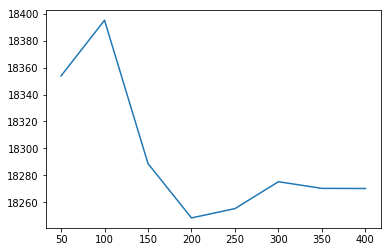

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results.keys(), results.values())
plt.show()

Given the results, which value for `n_estimators` seems best for the random forest model?  Use your answer to set the value of `n_estimators_best`.

In [57]:
n_estimators_best = 200

In this exercise, you have explored one method for choosing appropriate parameters in a machine learning model.  

If you'd like to learn more about [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization), you're encouraged to start with **grid search**, which is a straightforward method for determining the best _combination_ of parameters for a machine learning model.  Thankfully, scikit-learn also contains a built-in function [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) that can make your grid search code very efficient!

# Keep going

Continue to learn about **[gradient boosting](https://www.kaggle.com/alexisbcook/xgboost)**, a powerful technique that achieves state-of-the-art results on a variety of datasets.



---
**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*

# [XGBoost](https://www.kaggle.com/kernels/fork/3370271)


**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**

---



In this exercise, you will use your new knowledge to train a model with **gradient boosting**.


You will work with the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) dataset from the previous exercise. 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')

# Remove rows with missing target
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from trainig data
X_train_full,X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=0)

# "Cardinality" means the numer of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]

# Keep selected columns only
my_cols = low_categorical_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Step 1: Build model

In this step, you'll build and train your first model with gradient boosting.

- Begin by setting `my_model_1` to an XGBoost model.  Use the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class, and set the random seed to 0 (`random_state=0`).  **Leave all other parameters as default.**
- Then, fit the model to the training data in `X_train` and `y_train`.

In [59]:
from xgboost import XGBRegressor

# Define the model
my_model_1 = XGBRegressor(random_state=0)

# Fit the model
my_model_1.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Set `predictions_1` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.

In [60]:
from sklearn.metrics import mean_absolute_error

# Get predictions
predictions_1 = my_model_1.predict(X_valid)

Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions for the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In [61]:
# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid)

# Print MAE
print("Mean Absolute Error: ", mae_1)

Mean Absolute Error:  16803.434690710616


# Step 2: Improve the model

Now that you've trained a default model as baseline, it's time to tinker with the parameters, to see if you can get better performance!
- Begin by setting `my_model_2` to an XGBoost model, using the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class.  Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to get better results.
- Then, fit the model to the training data in `X_train` and `y_train`.
- Set `predictions_2` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.
- Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In order for this step to be marked correct, your model in `my_model_2` must attain lower MAE than the model in `my_model_1`. 

In [62]:
# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
my_model_2.fit(X_train, y_train)

# Get predictions
predictions_2 = my_model_2.predict(X_valid)

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, y_valid)

# Print MAE
print("Mean Absolute Error: ", mae_2)

[15:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Absolute Error:  16084.123354559075


# Step 3: Break the model

In this step, you will create a model that performs worse than the original model in Step 1.  This will help you to develop your intuition for how to set parameters.  You might even find that you accidentally get better performance, which is ultimately a nice problem to have and a valuable learning experience!
- Begin by setting `my_model_3` to an XGBoost model, using the [XGBRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor) class.  Use what you learned in the previous tutorial to figure out how to change the default parameters (like `n_estimators` and `learning_rate`) to design a model to get high MAE.
- Then, fit the model to the training data in `X_train` and `y_train`.
- Set `predictions_3` to the model's predictions for the validation data.  Recall that the validation features are stored in `X_valid`.
- Finally, use the `mean_absolute_error()` function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set.  Recall that the labels for the validation data are stored in `y_valid`.

In order for this step to be marked correct, your model in `my_model_3` must attain higher MAE than the model in `my_model_1`. 

In [63]:
# Define the model
my_model_3 = XGBRegressor(n_estimators=50, learning_rate=0.05)

# Fit the model
my_model_3.fit(X_train, y_train)

# Get the predictions
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_3 = mean_absolute_error(predictions_3, y_valid)


# Print MAE
print("Mean Absolute Error: ",mae_3)

[15:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Absolute Error:  23222.248956549658


# Keep going

Continue to learn about **[data leakage](https://www.kaggle.com/alexisbcook/data-leakage)**.  This is an important issue for a data scientist to understand, and it has the potential to ruin your models in subtle and dangerous ways!



---
**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*



# [Data Leakage](https://www.kaggle.com/kernels/fork/3370270)


**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**

---



Most people find target leakage very tricky until they've thought about it for a long time.

So, before trying to think about leakage in the housing price example, we'll go through a few examples in other applications. Things will feel more familiar once you come back to a question about house prices.


# 1. The Data Science of Shoelaces

Nike has hired you as a data science consultant to help them save money on shoe materials. Your first assignment is to review a model one of their employees built to predict how many shoelaces they'll need each month. The features going into the machine learning model include:
- The current month (January, February, etc)
- Advertising expenditures in the previous month
- Various macroeconomic features (like the unemployment rate) as of the beginning of the current month
- The amount of leather they ended up using in the current month

The results show the model is almost perfectly accurate if you include the feature about how much leather they used. But it is only moderately accurate if you leave that feature out. You realize this is because the amount of leather they use is a perfect indicator of how many shoes they produce, which in turn tells you how many shoelaces they need.

Do you think the _leather used_ feature constitutes a source of data leakage? If your answer is "it depends," what does it depend on?

After you have thought about your answer, check it against the 

Solution: This is tricky, and it depends on details of how data is collected (which is common when thinking about leakage). Would you at the beginning of the month decide how much leather will be used that month? If so, this is ok. But if that is determined during the month, you would not have access to it when you make the prediction. If you have a guess at the beginning of the month, and it is subsequently changed during the month, the actual amount used during the month cannot be used as a feature (because it causes leakage).solution below.

# 2. Return of the Shoelaces

You have a new idea. You could use the amount of leather Nike ordered (rather than the amount they actually used) leading up to a given month as a predictor in your shoelace model.

Does this change your answer about whether there is a leakage problem? If you answer "it depends," what does it depend on?


Solution: This could be fine, but it depends on whether they order shoelaces first or leather first. If they order shoelaces first, you won't know how much leather they've ordered when you predict their shoelace needs. If they order leather first, then you'll have that number available when you place your shoelace order, and you should be ok.

# 3. Getting Rich With Cryptocurrencies?

You saved Nike so much money that they gave you a bonus. Congratulations.

Your friend, who is also a data scientist, says he has built a model that will let you turn your bonus into millions of dollars. Specifically, his model predicts the price of a new cryptocurrency (like Bitcoin, but a newer one) one day ahead of the moment of prediction. His plan is to purchase the cryptocurrency whenever the model says the price of the currency (in dollars) is about to go up.

The most important features in his model are:
- Current price of the currency
- Amount of the currency sold in the last 24 hours
- Change in the currency price in the last 24 hours
- Change in the currency price in the last 1 hour
- Number of new tweets in the last 24 hours that mention the currency

The value of the cryptocurrency in dollars has fluctuated up and down by over \$100 in the last year, and yet his model's average error is less than \$1. He says this is proof his model is accurate, and you should invest with him, buying the currency whenever the model says it is about to go up.

Is he right? If there is a problem with his model, what is it?


Solution: There is no source of leakage here. These features should be available at the moment you want to make a predition, and they're unlikely to be changed in the training data after the prediction target is determined. But, the way he describes accuracy could be misleading if you aren't careful. If the price moves gradually, today's price will be an accurate predictor of tomorrow's price, but it may not tell you whether it's a good time to invest. For instance, if it is  100today,amodelpredictingapriceof100today,amodelpredictingapriceof 100 tomorrow may seem accurate, even if it can't tell you whether the price is going up or down from the current price. A better prediction target would be the change in price over the next day. If you can consistently predict whether the price is about to go up or down (and by how much), you may have a winning investment opportunity.

# 4. Preventing Infections

An agency that provides healthcare wants to predict which patients from a rare surgery are at risk of infection, so it can alert the nurses to be especially careful when following up with those patients.

You want to build a model. Each row in the modeling dataset will be a single patient who received the surgery, and the prediction target will be whether they got an infection.

Some surgeons may do the procedure in a manner that raises or lowers the risk of infection. But how can you best incorporate the surgeon information into the model?

You have a clever idea. 
1. Take all surgeries by each surgeon and calculate the infection rate among those surgeons.
2. For each patient in the data, find out who the surgeon was and plug in that surgeon's average infection rate as a feature.

Does this pose any target leakage issues?
Does it pose any train-test contamination issues?


Solution: This poses a risk of both target leakage and train-test contamination (though you may be able to avoid both if you are careful).

You have target leakage if a given patient's outcome contributes to the infection rate for his surgeon, which is then plugged back into the prediction model for whether that patient becomes infected. You can avoid target leakage if you calculate the surgeon's infection rate by using only the surgeries before the patient we are predicting for. Calculating this for each surgery in your training data may be a little tricky.

You also have a train-test contamination problem if you calculate this using all surgeries a surgeon performed, including those from the test-set. The result would be that your model could look very accurate on the test set, even if it wouldn't generalize well to new patients after the model is deployed. This would happen because the surgeon-risk feature accounts for data in the test set. Test sets exist to estimate how the model will do when seeing new data. So this contamination defeats the purpose of the test set.








# 5. Housing Prices

You will build a model to predict housing prices.  The model will be deployed on an ongoing basis, to predict the price of a new house when a description is added to a website.  Here are four features that could be used as predictors.
1. Size of the house (in square meters)
2. Average sales price of homes in the same neighborhood
3. Latitude and longitude of the house
4. Whether the house has a basement

You have historic data to train and validate the model.

Which of the features is most likely to be a source of leakage?

In [64]:
# Fill in the line below with one of 1, 2, 3 or 4.
potential_leakage_feature = 2

`# Fill in the line below with one of 1, 2, 3 or 4.
potential_leakage_feature = 2`

# Conclusion
Leakage is a hard and subtle issue. You should be proud if you picked up on the issues in these examples.

Now you have the tools to make highly accurate models, and pick up on the most difficult practical problems that arise with applying these models to solve real problems.

There is still a lot of room to build knowledge and experience. Try out a [Machine Learning Competition](https://www.kaggle.com/competitions) or look through our [Datasets](https://kaggle.com/datasets) to practice your new skills.

Again, Congratulations!



---
**[Intermediate Machine Learning Home Page](https://www.kaggle.com/learn/intermediate-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*